#August 2015 
#Author: FBB

#reproduce the result in http://www.mdrc.org/sites/default/files/What%20Strategies%20Work%20for%20the%20Hard%20FR.pdf 


In [7]:
import os
import sys
import numpy as np
import pylab as pl


import json
import os
#s = json.load( open(os.getenv("PUI2015")+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

#from IPython.display import Image
#Image(filename='../plotsforclasses/NYCReentryprogram_title.png')



Populating the interactive namespace from numpy and matplotlib


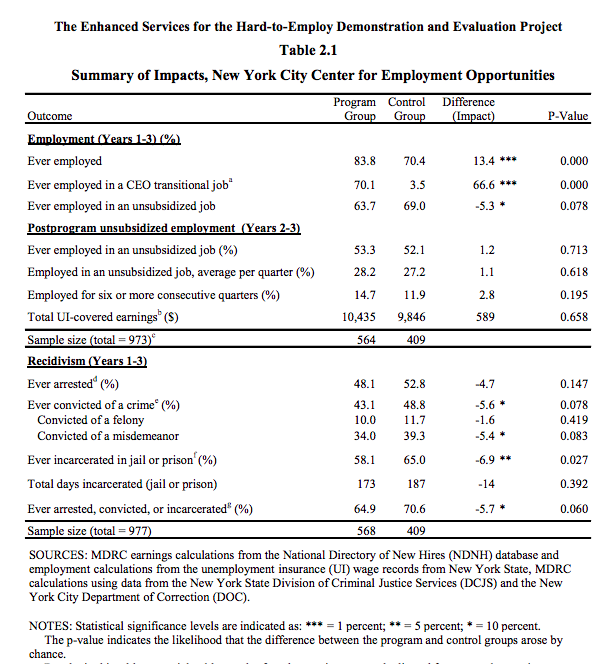

In [2]:
#Image(filename='../plotsforclasses/NYCReentryprogram.png')

#NULL HYPOTHESIS: the % of former prisoners employed after release is the same or lower for candidates who participated in the program as for the control group, significance level p=0.05

#$H_0: P_0 - P_1 \geq$    0
    
#$H_a: P_0 - P_1 $< 0    
    
    
#$\alpha$ = 0.05    

##this is a TEST OF PROPORTIONS. we use the Binomial distribution since it is a yes/no (bernulli) test for each subject: the former inmate was or was not ever employed in a CEO transitional job (second row in the table above):
#$P_0=0.035, P_1=0.701$

In [9]:

alpha=0.05
#we like fractions better then percentages. as a rule of thumb, either use fractions or counts
P_0=3.5*0.01 
P_1=70.1*0.01

n_0=409
n_1=564

#lets get the counts by multiplying by the sample size
Nt_0=P_0*n_0
Nt_1=P_1*n_1


#2 samples, categorical data
#TWO OPTIONS z test, or chi square test.  

#START WITH Z TEST

##the z test compares the stanrard deviation of the expected distribution and the observed result. it tells you literally how many standard deviations from the tail an observation is, under the _assumption of normality
must define the sample standard deviation 

In [10]:
#define the sample proportion first
sp=(P_0*n_0+P_1*n_1)/(n_1+n_0)
print sp

0.421047276465


#standard deviation of the sampling distribution the distribution is Binomial, the binomail stdev is 

(see a proof here!: http://stats.stackexchange.com/questions/29641/standard-error-for-the-mean-of-a-sample-of-binomial-random-variables!): 

$\sqrt{\frac{p(1 - p)}{n}}$

for 2 samples this becomes 

$\sqrt{ \frac{ \hat{p}(1 - \hat{p})} {n1} + \frac{ \hat{p}(1 - \hat{p})} {n1} }$

cfr: page 138 of Statistics in a Nutshell, eq. 5.12 and here http://stattrek.com/hypothesis-test/difference-in-proportions.aspx?Tutorial=AP



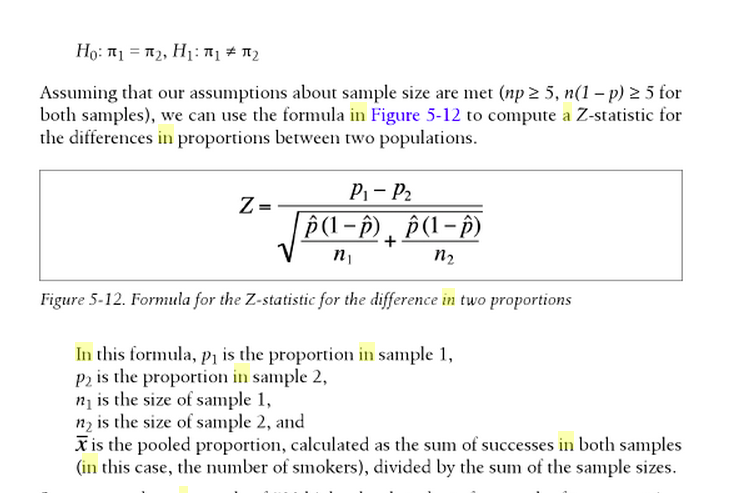

In [5]:
#Image("SiNS5.13.png")

Note that in the Image above, taken from the online version of the book, $\bar{x}$ should be $\hat{p}$!!

In [19]:
# i am goonna create a little one line function to calculate the standard dev, it is not really needed, but just to show you how you do such a thing
sp_stdev= lambda p, n: np.sqrt( p * ( 1 - p ) /n[0] +  p * ( 1 - p )/n[1]  )


sp_stdev_2y=sp_stdev((Nt_0+Nt_1)/(n_0+n_1),[n_0,n_1])
print P_0, n_0, n_1, sp_stdev_2y,(Nt_0+Nt_1)/(n_0+n_1),(Nt_0+Nt_1),(n_0+n_1)



0.035 409 564 0.0320658086057 0.421047276465 409.679 973


#z score: how many standard deviation away from the population parameter is my statistic?

#$z=\frac{P_1-P_0}{\sigma}$

In [13]:
zscore = lambda p0, p1, s : (p0-p1)/s
z_2y = zscore(P_1, P_0, sp_stdev_2y)
print z_2y


20.7697865408


note that using p0-p1 or p1-p0 at the numerator is equivalent because the standardizes normal value of z has mean 0 (see image below) so that we can use the absolute value of the z score, or equivalently look for P[Z,z] if z is positive, and P[Z>z] if z is negative.

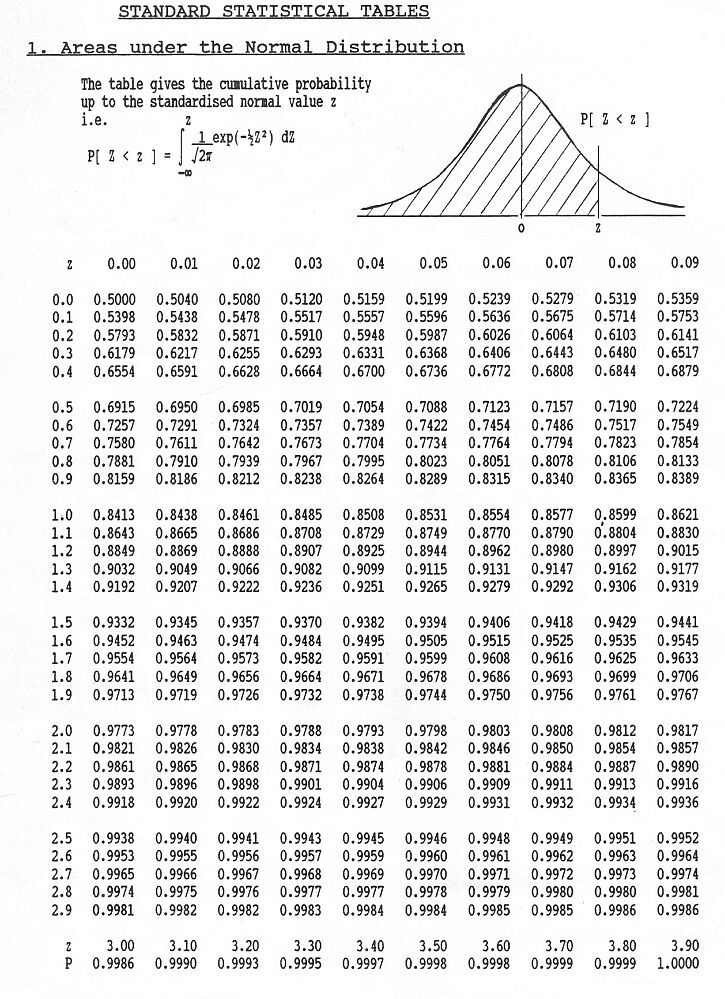

In [14]:
Image('http://intersci.ss.uci.edu/wiki/images/3/3a/Normal01.jpg')

##if $p<\alpha$ : reject H0

##IMPORTANT!! note that this P is not the p-value, but 
##p-value=1-P

In [15]:
##p-value for employment after 2 years: since the largest number we read off the table for alpha=0.05 is smaller then the value for our statistic our p-value will be smaller then calculated using .9998
##thus using 0.9998 is a **conservative** approach. 

p_2y=1-0.9998


def report_result(p,a):
    print 'is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a)
    if p<a:
        print "YES!"
    else: print "NO!"
    
    print 'the Null hypothesis is {}'.format( 'rejected' if p<a  else 'not rejected') 

    
report_result(p_2y,alpha)

is the p value 0.00 smaller than the critical value 0.05? 
YES!
the Null hypothesis is rejected


#!!!!!!!!TODO FOR YOU


##what if we used the values for where the former inmate was or was not ever employed in a CEO transitional job 3 years after release (4th row of the table)? 

#$P_0 = ??, P_1= ??$

#look up data table and insert the appropriate values to get the appropriate result!

In [22]:
P_0=0.521
P_1=0.533

Nt_0=P_0*n_0
Nt_1=P_1*n_1
sp_stdev_3y=sp_stdev((Nt_0+Nt_1)/(n_0+n_1),[n_0,n_1])

z_3y = zscore(P_1, P_0, sp_stdev_3y)
print sp_stdev_3y,z_3y


0.0324224126866 0.370114343926


In [23]:
p_3y=1-0.6443

report_result(p_3y,alpha)

is the p value 0.36 smaller than the critical value 0.05? 
NO!
the Null hypothesis is not rejected


#Now lets do it with the $\chi^2$ test

#this can also be done with the $\chi^2$ distribution, see "Statistics In a Nutshell Chapter 4", or http://math.hws.edu/javamath/ryan/ChiSquare.html (if you are really just interested in the formula at face value)

##the chisq statistics tests a number against the distribution of the following quantity:

$$\chi^2 = \Sigma \frac{(observation - expectation)^2}{expectation}$$


if we talk about sample fractions  that is 

$$\chi^2 = \Sigma \frac{(f_{observed} - f_{expectated})^2}{f_{expected}}$$

##turns out this quantity is distributed according to a chi square distribution, so if i get the $\chi^2$ statistics i can compare it to the full chisq distribution and see how far in the tail it is

##the trickiest part (not that tricky) is to figure out the table of values. please see Statistics In a Nutshell Chapter 4, for our data for example:

|employed in subsadized job |     employed   | not employes   |                   
|---------------------------|----------------|------------------|---------------------------|
| test sample               | $70.1*5.64$    | $29.9*5.64$      | 564                       |
| control sample            | $3.5*4.09$     | $96.5*4.09$      | 409                       |
|                           |                |                  |                           |
| total                     | 409.679        |  562.912         | 973         |

the expected ratio is the product of the total of all rows and all columns, devided by the total

expected = $\frac{row tot * col tot}{total}$

In [27]:
print (70.1*5.64),(.701*564)

395.364 395.364


In [24]:
Ntot = 973
expected = 564*409*409.679*562.912
sample_values = [[70.1*5.64,29.9*5.64],[3.05*4.09,96.5*4.09]]
 
chisqstat= lambda N, values, expect : N*((values[0][0]*values[1][1]-values[0][1]*values[1][0])**2)/(expect)

print chisqstat(Ntot,  sample_values, expected), expected


433.44352059 53196936347.3


#!!!!!! TODO FOR YOU!
#lets see what the chi sq statistics says about the employment for >6 consecutive months (raw 6)

|employed in subsadized job |     employed   | not employes   |                   
|---------------------------|----------------|------------------|---------------------------|
| test sample               |    82.9 |   481.1  | 564                       |
| control sample            |  48.67  |   360.33   | 409                       |
|                           |                |                  |                           |
| total                     |     131.57   |  841.4         | 973         |

In [28]:
Ntot = 973
expected = 131.57*841.4*564*409
sample_values = [[.147*564,(1-.147)*564],[.119*409,(1-.119)*409]]
 


chisqstat= lambda N, values, expect : N*((values[0][0]*values[1][1]-values[0][1]*values[1][0])**2)/(expect)

print chisqstat(Ntot,  sample_values, expected), expected

1.58954172526 25536524766.6


In [29]:
#Image("http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG")

432 is hella larger then 3.84

why am i mentioning 3.84?

how does the 6mo chi square statistic that you derived compare?

please  state what that means in terms of your hypothesis in a markdown cell below!

We do not reject the null hypothesis is that the proportion of prisoners in the treatment group who have been employed for 6 or more consec. quarters is the same or lower. 1.59 isn't hella larger than 3.84. Indeed it is smaller.